<h1>REGIONE ABRUZZO</h1>

Confronto dei dati relativi ai decessi registrati dall'ISTAT e i decessi causa COVID-19 registrati dalla Protezione Civile Italiana con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI MENSILI REGIONE ABRUZZO ISTAT</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Abruzzo </b> dal <b>2015</b> al <b>30 gigno 2020</b>.

In [62]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_istat = pd.read_csv('../../csv/regioni/abruzzo.csv')
decessi_istat.head()

,DATA,TOTALE
0,2015-01-31,1438
1,2015-02-28,1371
2,2015-03-31,1332
3,2015-04-30,1160
4,2015-05-31,1117


In [63]:
decessi_istat['DATA'] = pd.to_datetime(decessi_istat['DATA'])
decessi_istat.TOTALE = pd.to_numeric(decessi_istat.TOTALE)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [64]:
decessi_istat = decessi_istat[decessi_istat['DATA'] > '2020-02-29']
decessi_istat.head()


,DATA,TOTALE
62,2020-03-31,1483
63,2020-04-30,1303
64,2020-05-31,1060
65,2020-06-30,936


<h3>Creazione serie storica dei decessi ISTAT</h3>

In [65]:
decessi_istat = decessi_istat.set_index('DATA')
decessi_istat = decessi_istat.TOTALE
decessi_istat

DATA
2020-03-31    1483
2020-04-30    1303
2020-05-31    1060
2020-06-30     936
Name: TOTALE, dtype: int64

<h2>DECESSI MENSILI REGIONE ABRUZZO CAUSATI DAL COVID</h2>

Il DataFrame contine i dati forniti dalla Protezione Civile relativi ai decessi mensili della regione <b>Abruzzo</b> da <b> marzo 2020</b> al <b>30 giugno 2020</b>.

In [66]:
covid = pd.read_csv('../../csv/regioni_pesate/abruzzo.csv')
covid.head()

,data,deceduti
0,2020-03-31,105.915
1,2020-04-30,188.805
2,2020-05-31,78.285
3,2020-06-30,54.339


In [67]:
covid['data'] = pd.to_datetime(covid['data'])
covid.deceduti = pd.to_numeric(covid.deceduti)

In [68]:
covid = covid.set_index('data')
covid.head()

,deceduti
data,
2020-03-31,105.915
2020-04-30,188.805
2020-05-31,78.285
2020-06-30,54.339


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [69]:
covid = covid.deceduti

<h2>PREDIZIONE DECESSI MENSILI REGIONE SECONDO MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi mensili della regione <b>Abruzzo</b> secondo la predizione del modello SARIMA applicato. 

In [70]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_abruzzo.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,1425.734546
2,2015-03-31,1385.227846
3,2015-04-30,1345.012862
4,2015-05-31,1227.802186


In [71]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,1425.734546
2,2015-03-31,1385.227846
3,2015-04-30,1345.012862
4,2015-05-31,1227.802186


In [72]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [73]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,1215.257332
63,2020-04-30,1200.924520
64,2020-05-31,1085.335386
65,2020-06-30,1113.418254


In [74]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,1215.257332
2020-04-30,1200.924520
2020-05-31,1085.335386
2020-06-30,1113.418254


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [75]:
predictions = predictions.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali mensili</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> della regione <b>Abruzzo</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b> e <b>giugno</b>.

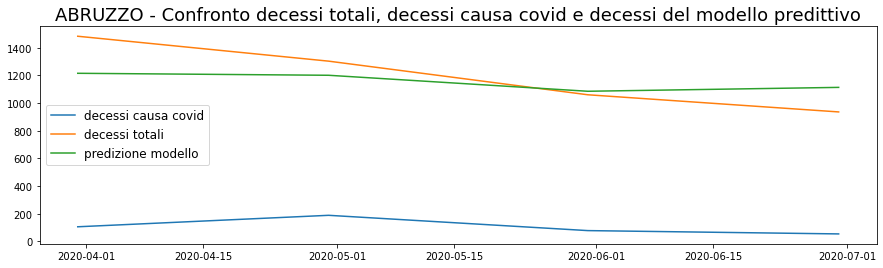

In [76]:
plt.figure(figsize=(15,4))
plt.title('ABRUZZO - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_istat, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

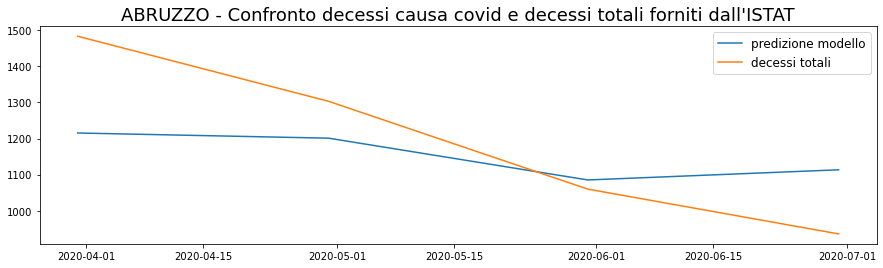

In [77]:
plt.figure(figsize=(15,4))
plt.title("ABRUZZO - Confronto decessi causa covid e decessi totali forniti dall'ISTAT", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(decessi_istat, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

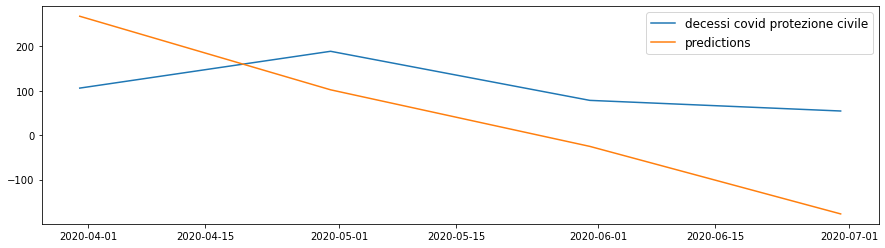

In [78]:
n = decessi_istat - predictions

plt.figure(figsize=(15,4))
plt.plot(covid, label='decessi covid protezione civile')
plt.plot(n, label='predictions')
plt.legend(prop={'size': 12})
plt.show()

<h3>Numero totale dei decessi COVID-19 previsti dal modello per la regione Abruzzo </h3>

In [80]:
total = n.sum()
print(int(total))

167


<h3>Numero totale dei decessi COVID-19 per la regione Abruzzo</h3>

In [81]:
m = covid.sum()
print(int(m))

427


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA della regione Abruzzo</h3>

In [82]:
# numero di decessi non registrati
x = decessi_istat - predictions - covid
x = x.sum()
print(int(x))

-260
